<span class="alert alert-success" style="display: block;">
    
## FNCE30012: Foundations of Fintech - Assignment 1: Fraud Detection

</span>

<span class="alert alert-info" style="display: inline-block;">
All questions must be completed and submitted via Jupyter Hub (any other submissions will not be
marked). The assignment notebook contains certain pre-defined variables. A submission that renames these
variables will attract zero marks. Calculations involving decimal numbers should be precise till 3 decimal
places (e.g., if answer is 4.122229, then one should use 4.123 instead of 4.1). 

You are **NOT** allowed to use `sleep` or other methods to slow down execution. 
    
Please use the **ED** forum to ask any queries regarding this assignment. 

<hr/>
    
**Late submission penalties**
- 10% of the maximum mark per day the assessment task is overdue;
- Assignments submitted 10 days after the deadline will not be graded and will receive a grade of zero.
- Exceeding word limits: Assessment tasks should not vary more than 10% from the required word count (where relevant).

**Assignment Extensions**
- Faculty extensions policy can be found here: [http://policy.unimelb.edu.au/MPF1326#section-4.37](http://policy.unimelb.edu.au/MPF1326#section-4.37)
- Requests for an assignment extension should be submitted here: [http://go.unimelb.edu.au/yh9n](http://go.unimelb.edu.au/yh9n)

**Submission**
This assignment should be submitted via the JupyterHub system. 

**Plagiarism declaration**
By submitting work for assessment I hereby declare that I understand the University’s policy on academic integrity and statement on the use of artificial intelligence software. In accordance with these documents, I declare that the work submitted is original and solely my work, and that I have not been assisted by a third party (collusion) apart from where the submitted work is for a designated collaborative task, in which case the individual contributions are indicated. I also declare that I have not used any writing tools or sources without proper acknowledgement (plagiarism). Where the submitted work is a computer program or code, I further declare that any copied code is declared in comments identifying the source at the start of the program or in a header file, that comments inline identify the start and end of the copied code, and that any modifications to code sources elsewhere are commented upon as to the nature of the modification.
    
<hr/>
    
**Important:** It is important that you follow the assignment submission instructions as per "How to submit assignments on JupyterHub" available under Modules/Assessment on Canvas. 

<span class="label label-danger text-uppercase">Note</span>: The assignment will ask you to follow certain precise instructions such as storing results in predefined variable names, or reading CSV files into dataframes with specific names. Failure to follow these instructions would attract penalty.
</span>

<span class="alert alert-danger"  style="display: inline-block;">
    <span class="label label-danger text-uppercase">Note</span>
    <span>
        Write your answers in <strong>this notebook</strong> only <em>within</em> the provided cells. <em>Do not</em> create additional cells or duplicate/copy existing cells. <em>Do not</em> rename this file. <br/>
        You may keep a copy of this base notebook as reference to original file and to compare that you haven't accidentally added cells, duplicated cells or changed the order of these cells. However, note that additional notebooks and copies aren't marked. 
    </span>
</span>

<span class="alert alert-info" style="display: inline-block;">

**Associated Data Files:** We will use two csv files for this assignment:
1. `transactions.csv` Each row denotes a transaction. The columns are as follows:

| Column Name | Description |
|:-----|:-----|
| `TRANSACTION_ID` | A unique ID of the credit card transaction |
| `TX_DATETIME`  | Date time of the transaction |
| `CUSTOMER_ID` | ID of the credit card owner |
| `TERMINAL_ID`  | ID of the terminal where transaction originated |
| `TX_AMOUNT` | Amount of the transaction in dollars |
| `TX_FRAUD` | Label denoting if the transaction was fraudulent (label of 1) or genuine (label of 0) |

2. `card_data.csv`. Each row denotes a transaction. This file contains pre-computed feature engineered columns (in addition to the ones listed above). The extra columns are as follows:

| Column Name | Description |
|---|---|
| `IS_WEEKEND` | Denotes if the transaction occurred over a weekend (label of 1) or a weekday (label of 0) |
| `IS_WEDNESDAY` | Denotes if the transaction occurred on Wednesday (label of 1) or any other day of the week (label of 0) |
| `IS_NIGHT` | Denotes if the transaction occurred during the night (label of 1) or during the day (label of 0) |
| `TX_HOUR` | The hour at which the transaction occurred |
| `TX_DATE` | The date of the transaction (i.e., the date excluding the time information) |
| `TX_WEEK`  | The week of the transaction (i.e., the week number when the transaction occurred) |
| `TERMINAL_TOTAL_1D` | The number of transactions that occurred in the previous day for the associated terminal ID |
| `TERMINAL_FRAUD_1D` | The number of fraudulent transactions that occurred in the previous day for the associated terminal ID |
| `TERMINAL_RISK_1D` | The proportion of transactions that were fraudulent in the previous day for the associated terminal ID |
| `CUSTOMER_TOTAL_1D` | The number of transactions that occurred in the previous day for the associated customer ID |
| `CUSTOMER_FRAUD_1D` | The number of fraudulent transactions that occurred in the previous day for the associated customer ID |
| `CUSTOMER_RISK_1D` | The proportion of transactions that were fraudulent in the previous day for the associated customer ID |
| `TERMINAL_TOTAL_1W`  | The number of transactions that occurred in the previous week for the associated terminal ID |
| `TERMINAL_FRAUD_1W`  | The number of fraudulent transactions that occurred in the previous week for the associated terminal ID |
| `TERMINAL_RISK_1W`  | The proportion of transactions that were fraudulent in the previous week for the associated terminal ID |
| `CUSTOMER_TOTAL_1W` | The number of transactions that occurred in the previous week for the associated customer ID |
| `CUSTOMER_FRAUD_1W` | The number of fraudulent transactions that occurred in the previous week for the associated customer ID |
| `CUSTOMER_RISK_1W`  | The proportion of transactions that were fraudulent in the previous week for the associated customer ID |
| `SPENT_1D`  | The average spent for the customer in the previous day |
| `SPENT_1W` | The average spent for the customer in the previous week |
    
</span>

### Predefined Package Imports

In [2]:
"""Import Required Libraries - No need to duplicate or reimport; 
This is a Read-Only cell. Remember to execute this cell once"""

# Import the numpy and pandas library
import numpy as np
import pandas as pd

# for date time
from datetime import datetime

# Import the matplotlib library, used for plotting
import matplotlib.pyplot as plt
import seaborn as sns 

# for stats and ML
import statsmodels.api as sm
from finml import train_model, build_model, split_by_threshold, evaluate, similarity, tfidf_vectorize
from sklearn import metrics

# disable messages to increase output readability
import warnings
import tensorflow as tf
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import random as tf_random
from tensorflow.keras.backend import clear_session
warnings.simplefilter(action='ignore', category=FutureWarning)
tf.get_logger().setLevel('ERROR')

In [3]:
"""This is a Read-Only cell. Remember to execute this cell once"""
def set_seeds(seed=123):
    import os, random
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

### Import your additional packages in the cell below
Further imports are not required, but you may use additional packages if you wish.

In [4]:
"""Your own additional imports go here"""
# BEGIN - YOUR CODE GOES HERE
import calendar
from sklearn.metrics import roc_auc_score
# END - YOUR CODE GOES HERE

In [5]:
"""Use the preloaded data in your workings below;
This is a Read-Only cell. Remember to execute this cell once"""
df_transactions = pd.read_csv("./transactions.csv", index_col="TRANSACTION_ID", parse_dates=["TX_DATETIME"])
df_transactions.head()

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
TRANSACTION_ID,,,,,
730399,2024-03-02 16:58:04,1610,7393,122.82,0
718607,2024-03-02 03:54:17,1610,3193,96.39,0
732845,2024-03-02 22:20:50,1610,2239,167.10,0
726608,2024-03-02 12:59:55,1610,9572,121.51,0
729587,2024-03-02 15:54:29,1610,9850,191.29,0


## Question 1 [1 marks]

<strong> Q1 (i) [<font color="red"> 0.5 marks </font>]</strong> 
The data contains transactions from `2024-03-01` till `2024-03-10` (inclusive). You should use all data till `2024-03-06` (inclusive) for training, and transactions that happened on `2024-03-10` for testing.

Split the given transaction data into training and testing sets based on these dates. You should use the provided variables to store the split data frames.

In [6]:
"""Predefined Variables - Do Not Change their Name;
This is a Read-Only cell. Remember to execute this cell once"""
df_train = None  # Replace None with correct value/code
df_test = None  # Replace None with correct value/code

In [7]:
"""Populate the variables shown above with appropriate values here"""
# BEGIN - YOUR CODE GOES HERE
df_train = df_transactions.loc[df_transactions['TX_DATETIME'].dt.date <= pd.to_datetime("2024-03-06")]
df_test = df_transactions.loc[df_transactions['TX_DATETIME'].dt.date == pd.to_datetime("2024-03-10")]
# END - YOUR CODE GOES HERE

<strong> Q1 (ii) [<font color="red"> 0.5 marks </font>]</strong> Plot the histogram of fraudulent and genuine transactions for the training and test datasets. You should plot them side by side with the plot for the training dataset on the left side of the plot of the test dataset. Your plots should be appropriately labelled. You should use a log scale for the y-axis.

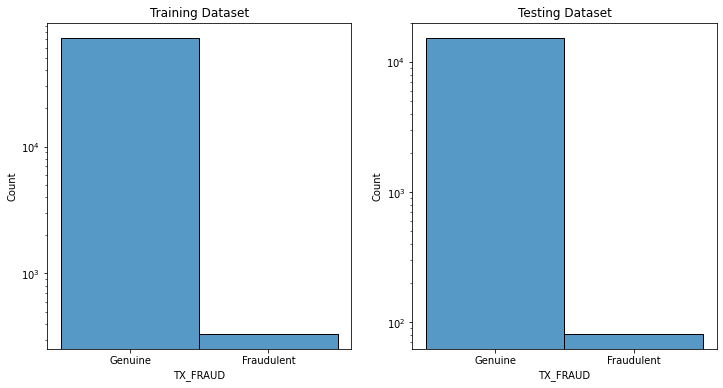

In [22]:
# BEGIN - YOUR CODE GOES HERE
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
# Histogram for the training dataset
sns.histplot(data=df_train, x="TX_FRAUD", discrete=True, ax=ax1, log_scale=(False, True))
ax1.set_title("Training Dataset")
ax1.set_xlabel("TX_FRAUD")
ax1.set_ylabel("Count")
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Genuine', 'Fraudulent'])

# Histogram for the test dataset
sns.histplot(data=df_test, x="TX_FRAUD", discrete=True, ax=ax2, log_scale=(False, True))
ax2.set_title("Testing Dataset")
ax2.set_xlabel("TX_FRAUD")
ax2.set_ylabel("Count")
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Genuine', 'Fraudulent'])
plt.show()
# END - YOUR CODE GOES HERE

## Question 2 [2 marks]

<strong> Q2 (i) [<font color="red"> 0.5 marks </font>]</strong> Fit a logistic regression model using the **relevant features** from the training portion of the transactions data.  You should use the given variable to store the fitted logistic regression model. You should also use the `statsmodels` package for logistic regression.

Note: You should not generate new features.

In [9]:
"""Predefined Variables - Do Not Change their Name;
This is a Read-Only cell. Remember to execute this cell once"""
logit_1 = None

In [10]:
"""Populate the variables shown above with appropriate values here"""
# BEGIN - YOUR CODE GOES HERE
features = ['TX_AMOUNT']
predict = "TX_FRAUD"

x = df_train[features] 
x = sm.add_constant(x)
y = df_train[predict]

logit_1 = sm.Logit(y,x).fit()
logit_1.summary()
# END - YOUR CODE GOES HERE

Optimization terminated successfully.
         Current function value: 0.026017
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               TX_FRAUD   No. Observations:                72687
Model:                          Logit   Df Residuals:                    72685
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 Aug 2024   Pseudo R-squ.:                  0.1104
Time:                        23:27:10   Log-Likelihood:                -1891.1
converged:                       True   LL-Null:                       -2125.7
Covariance Type:            nonrobust   LLR p-value:                4.713e-104
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5558      0.094    -70.022      0.000      -6.739      -6.372
TX_AMOUNT      0.0067      0.000     20.481      0.000       0.006       0.007
==============================================================================
"""

In [11]:
"""This is a Read-Only cell. Remember to execute this cell once"""
try:
    logit_1.summary()
except NameError:
    print(f"Did you forget to run the readonly cell above?")
except AttributeError:
    print(f"Your code is possibly incorrect for creating logit_1?")

<strong> Q2 (ii) [<font color="red"> 0.5 marks </font>]</strong> Train a neural network model using the **relevant features** from the training portiion of the transactions data. You should use the given variables to store the model components. The neural network should have 2 hidden layers with 8 units each.

In [12]:
"""Predefined Variables - Do Not Change their Name;
This is a Read-Only cell. Remember to execute this cell once"""
set_seeds(543) # Do not change this line
input_layer = None  # Input layer
op_1 = None  # Hidden layer 1
op_2 = None  # Hidden layer 2
output_layer = None  # Output layer
nn_1 = None

In [13]:
"""Populate the variables shown above with appropriate values here"""
# BEGIN - YOUR CODE GOES HERE
drop_features = ['TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID','TX_FRAUD']
X_train = df_train.drop(columns=drop_features)  
y_train = df_train["TX_FRAUD"]  
X_test = df_test.drop(columns=drop_features)  
y_test = df_test["TX_FRAUD"]  

clear_session()

units = 8
output_units, output_activation = (1, 'sigmoid')

hidden_layer_activation = "ReLU"
input_shape = X_train.shape[1:]
input_layer = Input(shape=input_shape, name="input_layer")

op_1 = Dense(units=units, activation=hidden_layer_activation, name="hidden_layer_1")(input_layer)
op_2 = Dense(units=units, activation=hidden_layer_activation, name="hidden_layer_2")(op_1)
output_layer = Dense(units=output_units, activation=output_activation, name="output_layer")(op_2)

nn_1 = Model(inputs=[input_layer], outputs=[output_layer])
nn_1.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# Set training parameters
epochs = 1000
patience = 2
verbose = 2
batch_size = X_train.shape[0]

# Define the early stopping callback
callbacks = [EarlyStopping(monitor='val_loss', patience=patience)]

# Train and validate the model
nn_1.fit(X_train, y_train,
                   epochs=epochs,
                   callbacks=callbacks,
                   validation_data=(X_test, y_test),
                   batch_size=batch_size,
                   verbose=verbose)


# END - YOUR CODE GOES HERE

Epoch 1/1000
1/1 - 1s - loss: 1.0172 - accuracy: 0.9954 - val_loss: 0.8522 - val_accuracy: 0.9948 - 525ms/epoch - 525ms/step
Epoch 2/1000
1/1 - 0s - loss: 1.0083 - accuracy: 0.9954 - val_loss: 0.8447 - val_accuracy: 0.9947 - 21ms/epoch - 21ms/step
Epoch 3/1000
1/1 - 0s - loss: 0.9994 - accuracy: 0.9954 - val_loss: 0.8373 - val_accuracy: 0.9947 - 19ms/epoch - 19ms/step
Epoch 4/1000
1/1 - 0s - loss: 0.9906 - accuracy: 0.9954 - val_loss: 0.8298 - val_accuracy: 0.9947 - 19ms/epoch - 19ms/step
Epoch 5/1000
1/1 - 0s - loss: 0.9818 - accuracy: 0.9954 - val_loss: 0.8225 - val_accuracy: 0.9946 - 22ms/epoch - 22ms/step
Epoch 6/1000
1/1 - 0s - loss: 0.9731 - accuracy: 0.9954 - val_loss: 0.8151 - val_accuracy: 0.9946 - 30ms/epoch - 30ms/step
Epoch 7/1000
1/1 - 0s - loss: 0.9644 - accuracy: 0.9953 - val_loss: 0.8078 - val_accuracy: 0.9946 - 19ms/epoch - 19ms/step
Epoch 8/1000
1/1 - 0s - loss: 0.9557 - accuracy: 0.9953 - val_loss: 0.8005 - val_accuracy: 0.9946 - 19ms/epoch - 19ms/step
Epoch 9/1000
1

In [14]:
"""This is a Read-Only cell. Remember to execute this cell once"""
try:
    nn_1.summary()
except NameError:
    print(f"Did you forget to run the readonly cell above?")
except AttributeError:
    print(f"Your code is possibly incorrect for creating nn_1?")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 8)                 16        
                                                                 
 hidden_layer_2 (Dense)      (None, 8)                 72        
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<strong> Q2 (iii) [<font color="red"> 0.5 marks </font>]</strong> Calculate the AUC metric for the trained logistic regression model and the trained neural network model using the test dataset. You should use sklearn metrics to compute AUC scores and use the given variables to store the AUC metric.

In [15]:
"""Predefined Variables - Do Not Change their Name;
This is a Read-Only cell. Remember to execute this cell once"""
logit_1_auc = None
nn_1_auc = None

In [56]:
"""Populate the variables shown above with appropriate values here"""
# BEGIN - YOUR CODE GOES HERE
# Get predicted probabilities for both models
X_test = sm.add_constant(X_test)
logit_1_probs = logit_1.predict(X_test) 
logit_1_auc = round(roc_auc_score(y_test, logit_1_probs),3)
X_test.drop(columns = "const", axis = 1, inplace = True)

nn_1_probs = nn_1.predict(X_test).ravel()  
nn_1_auc = round(roc_auc_score(y_test, nn_1_probs),3)

# END - YOUR CODE GOES HERE

486/486 [==============================] - 0s 557us/step


In [57]:
"""This is a Read-Only cell. Remember to execute this cell once"""
try:
    print(f"logit_1_auc is {logit_1_auc}")
    print(f"nn_1_auc is {nn_1_auc}")
except NameError:
    print(f"Did you forget to run the readonly cell above?")

logit_1_auc is 0.634
nn_1_auc is 0.366


<strong> Q2 (iv) [<font color="red"> 0.5 marks </font>]</strong> Write the AUC scores for the logit and neural network models. Are the obtained AUC scores good? Is it advisable to train a large neural network model (e.g., 100+ layers) on the given data set? Justify your answer.  [Word limit < 150 words]

<span class="label label-info text-uppercase">Note</span>
<span>Write your justification in the Markdown cell below</span>

The AUC scores for the models are 0.634 for the logistic regression model and 0.366 for the neural network model. These scores indicate that the logistic regression model performs better than the neural network model in distinguishing between fraudulent and non-fraudulent transactions. An AUC score of 0.634 is not high but still shows some predictive power, while a score of 0.366 is quite low and suggests that the neural network model is performing worse than random guessing.
Given these results, it is not advisable to train a large neural network model with 100+ layers on this dataset. The poor performance of the current neural network suggests that the model is struggling with the data, possibly due to insufficient feature representation or overfitting. A larger model could exacerbate these issues, leading to even worse performance. 

## Question 3 [5.5 marks]

<strong> Q3 (i) [<font color="red"> 0.5 marks </font>]</strong> Add three columns in the `df_transactions` dataframe:
1. A column named `TX_DATE` should have the date of the transaction without any time information.
2. A column named `TX_WEEKDAY` should have the day of the week (Monday is 0 and Sunday is 6).
3. A column name `TX_WEEK` should have the week number in which the transaction occurred (e.g., first week of January is week 1, the second week of January is week 2 and so forth). A week is defined as starting on a Monday and ending on a Sunday.

In [18]:
"""Add the columns discussed above with appropriate values here"""
# BEGIN - YOUR CODE GOES HERE
df_transactions["TX_DATE"] = df_transactions["TX_DATETIME"].dt.date
df_transactions["TX_WEEKDAY"] = df_transactions["TX_DATETIME"].apply(lambda dt: dt.weekday())
df_transactions["TX_WEEK"] = df_transactions["TX_DATETIME"].apply(lambda date: date.isocalendar().week)
df_transactions.head()
# END - YOUR CODE GOES HERE

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,TX_DATE,TX_WEEKDAY,TX_WEEK
TRANSACTION_ID,,,,,,,,
730399,2024-03-02 16:58:04,1610,7393,122.82,0,2024-03-02,5,9
718607,2024-03-02 03:54:17,1610,3193,96.39,0,2024-03-02,5,9
732845,2024-03-02 22:20:50,1610,2239,167.10,0,2024-03-02,5,9
726608,2024-03-02 12:59:55,1610,9572,121.51,0,2024-03-02,5,9
729587,2024-03-02 15:54:29,1610,9850,191.29,0,2024-03-02,5,9


<strong> Q3 (ii) [<font color="red"> 0.5 marks </font>]</strong> Generate a line plot to show the number of fraudulent transactions that occur in relation to each week day. The x-axis should have the number of the week day (Monday is 0 and Sunday is 6), and the y-axis should show the number of transactions on that week day. Label your plot appropriately. 

In [23]:
"""Generate your plot here"""
# BEGIN - YOUR CODE GOES HERE
plt.figure(figsize = (10,6))
frauds_count = df_transactions["TX_FRAUD"].groupby(df_transactions["TX_WEEKDAY"]).count()
plt.plot(frauds_count.index, frauds_count.values, marker='o')
plt.title('Number of fraudulent transactions by weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of fraudulent transactions')
plt.xticks(ticks=range(7), labels=[calendar.day_name[i] for i in range(7)])
plt.grid(True)
plt.show()
# END - YOUR CODE GOES HERE

KeyError: 'TX_WEEKDAY'

<Figure size 720x432 with 0 Axes>

<strong> Q3 (iii) [<font color="red"> 0.5 marks </font>]</strong> Eve claims that the number of fraudulent transactions are highest on weekends. Hence, adding a feature to denote if a transaction occurred on a weekend or not is an important feature to have in credit card fraud detection. Is Eve's claim true?

In [20]:
"""Write your code here for your justification below"""
# BEGIN - YOUR CODE GOES HERE
is_weekend = df_transactions['TX_WEEKDAY'].apply(lambda x: 1 if x >= 5 else 0)
weekend_frauds = df_transactions["TX_FRAUD"].groupby(is_weekend).count()
weekend_frauds_percent = round((weekend_frauds[1]/weekend_frauds.sum())*100, 2)
weekday_frauds_percent = round((weekend_frauds[0]/weekend_frauds.sum())*100, 2)

print(f"Weekends fraudulent transactions percent: {weekend_frauds_percent}%" + "\n" +
      f"Other days fraudulent transactions percent: {weekday_frauds_percent}%")
# END - YOUR CODE GOES HERE

Weekends fraudulent transactions percent: 49.89%
Other days fraudulent transactions percent: 50.11%


<span class="label label-info text-uppercase">Note</span>
<span>Write your justification in the Markdown cell below</span>

#### WRITE YOUR ANSWER(S) HERE IN THIS CELL
Based on the results provided, the difference is relatively small (49.89% on weekends vs. 50.11% on other days), indicating that The number of fraudulent transactions is very close between weekends and other days. However, as the weekends occupy 2 days out of 7 days of the week, we only expected around 28.57% of fraudulent transactions during this period. This suggests a disproportionate number of fraudulent transactions occurring on weekends compared to what would be expected, and therefore we conclude that Eve's statement is true.

<strong> Q3 (iv) [<font color="red"> 1.5 marks </font>]</strong> This question asks you to create column that will measure the *Risk* of a terminal over a day. In particular, we are interested in the ratio of fraudulent transactions arising from a terminal on the previous day. The column that should be added to the `df_transactions` dataframe is:
1. `TERMINAL_RISK_1D:`: The ratio of fraudulent transactions on the previous day

In [21]:
"""Add the columns discussed above with appropriate values here"""
# BEGIN - YOUR CODE GOES HERE
grouped_cols = ["TERMINAL_ID", "TX_DATE"]
terminal_stats = df_transactions.groupby(grouped_cols).agg(
    total_transactions=("TX_FRAUD", "count"),
    fraudulent_transactions=("TX_FRAUD", "sum")
).reset_index()

terminal_stats['daily_risk'] = terminal_stats['fraudulent_transactions'] / terminal_stats['total_transactions']
terminal_stats['TERMINAL_RISK_1D'] = terminal_stats.groupby(['TERMINAL_ID'])['daily_risk'].shift()
df_transactions = pd.merge(df_transactions, terminal_stats[['TERMINAL_ID', 'TX_DATE', 'TERMINAL_RISK_1D']],
                           on=['TERMINAL_ID', 'TX_DATE'], 
                           how='left')
df_transactions.sort_values(by= "TX_DATETIME").head()
# END - YOUR CODE GOES HERE

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,TX_DATE,TX_WEEKDAY,TX_WEEK,TERMINAL_RISK_1D
3988,2024-03-01 00:00:35,1866,5557,90.53,0,2024-03-01,4,9,NaN
25572,2024-03-01 00:00:58,286,2776,84.85,0,2024-03-01,4,9,NaN
12314,2024-03-01 00:01:59,4475,4716,125.81,0,2024-03-01,4,9,NaN
26980,2024-03-01 00:02:22,950,6093,155.13,0,2024-03-01,4,9,NaN
9594,2024-03-01 00:04:48,2384,4039,148.01,0,2024-03-01,4,9,NaN


<strong> Q3 (v) [<font color="red"> 1.5 marks </font>]</strong> This question asks you to create columns that will store the expected *Monetary* value of transactions for customers. In particular, we are interested in the *median* value of transactions a customer did on the previous day and in the previous week (where week is defined as starting on a Monday and ending on a Sunday). The columns should be added to the `df_transactions` dataframe as per:
1. `SPENT_1D`: The median dollar value of transactions for this customer on previous day
2.  `SPENT_1W`: The median dollar value of transactions for this customer on previous week

*Note* The `df_transactions` dataframe should not have any columns that are not required as per this assignment.

In [22]:
"""Add the columns discussed above with appropriate values here"""
# BEGIN - YOUR CODE GOES HERE
df_transactions['TX_DATE'] = pd.to_datetime(df_transactions['TX_DATE'])

daily_median = df_transactions.groupby(['CUSTOMER_ID', 'TX_DATE'])['TX_AMOUNT'].median().reset_index()
daily_median.rename(columns={'TX_AMOUNT': 'SPENT_1D'}, inplace=True)
daily_median['SPENT_1D'] = daily_median.groupby('CUSTOMER_ID')['SPENT_1D'].shift()
df_transactions = pd.merge(df_transactions, daily_median[['CUSTOMER_ID', 'TX_DATE', 'SPENT_1D']], 
                           on=['CUSTOMER_ID', 'TX_DATE'], 
                           how='left')

weekly_median = df_transactions.groupby(['CUSTOMER_ID', 'TX_WEEK'])['TX_AMOUNT'].median().reset_index()
weekly_median.rename(columns={'TX_AMOUNT': 'SPENT_1W'}, inplace=True)
weekly_median['SPENT_1W'] = weekly_median.groupby('CUSTOMER_ID')['SPENT_1W'].shift()
df_transactions = pd.merge(df_transactions, weekly_median[['CUSTOMER_ID', 'TX_WEEK', 'SPENT_1W']], 
                           on=['CUSTOMER_ID', 'TX_WEEK'], 
                           how='left')
df_transactions.sort_values(by= "TX_DATETIME").head()
# END - YOUR CODE GOES HERE

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,TX_DATE,TX_WEEKDAY,TX_WEEK,TERMINAL_RISK_1D,SPENT_1D,SPENT_1W
3988,2024-03-01 00:00:35,1866,5557,90.53,0,2024-03-01,4,9,NaN,NaN,NaN
25572,2024-03-01 00:00:58,286,2776,84.85,0,2024-03-01,4,9,NaN,NaN,NaN
12314,2024-03-01 00:01:59,4475,4716,125.81,0,2024-03-01,4,9,NaN,NaN,NaN
26980,2024-03-01 00:02:22,950,6093,155.13,0,2024-03-01,4,9,NaN,NaN,NaN
9594,2024-03-01 00:04:48,2384,4039,148.01,0,2024-03-01,4,9,NaN,NaN,NaN


<strong> Q3 (vi) [<font color="red"> 0.5 marks </font>]</strong> Generate a scatter plot with amount (in dollars) on y-axis, and customer id on the x-axis. The scatter plot should have two markers, one for the median amount a customer spent on the previous day, and second for the value of fraudulent transactions for that customer. You should label the plot appropriately.

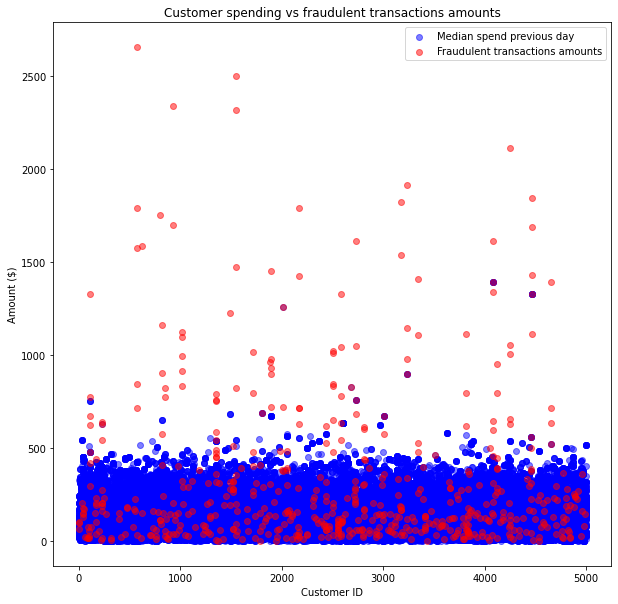

In [23]:
"""Generate your plot here"""
# BEGIN - YOUR CODE GOES HERE
fraud_transactions = df_transactions[df_transactions['TX_FRAUD'] == 1]

plt.figure(figsize=(10, 10))
# Median amount spent by customer on the previous day (SPENT_1D)
plt.scatter(df_transactions['CUSTOMER_ID'].values, df_transactions['SPENT_1D'], 
            color='blue', alpha=0.5, label='Median spend previous day')

# Fraudulent transaction amounts
plt.scatter(fraud_transactions['CUSTOMER_ID'].values, fraud_transactions['TX_AMOUNT'], 
            color='red', alpha=0.5, label='Fraudulent transactions amounts')

plt.title('Customer spending vs fraudulent transactions amounts')
plt.xlabel('Customer ID')
plt.ylabel('Amount ($)')
plt.legend()
plt.show()
# END - YOUR CODE GOES HERE

<strong> Q3 (vii) [<font color="red"> 0.5 marks </font>]</strong> Will including the amount a customer spent in the previous day help in improving the logistic regression model from the previous question? You do not need to run the logistic regression model. You should answer the question in the context of the scatter plot from previous question.  [Word limit < 150 words] 

<span class="label label-info text-uppercase">Note</span>
<span>Write your justification in the Markdown cell below</span>

Based on the scatter plot, the median spend of customers on the previous day seems to be concentrated mainly in the lower range, with a dense clustering of points near the bottom of the plot. The amounts for fraudulent transactions are dispersed at higher values and do not show a strong overlap with the median spending. This visualization suggests that the amount spent in fraudulent transactions tends to be higher compared to the median daily spending of customers, indicating that there might be a distinct pattern where higher spending could be associated with fraud. This means adding this feature to the model will likely improve the performance of the model 


## Question 4 [3.5 marks]

This question will use the `card_data.csv` dataset. This data has been loaded for you in the `df_card_data` variable. The data contains transactions from `2024-04-01` till `2024-04-10` (inclusive). You should use all data till `2024-04-09` (inclusive) for training, and transactions that happened on `2024-04-10` for testing.

In [24]:
"""Use the preloaded data in your workings below;
This is a Read-Only cell. Remember to execute this cell once"""
df_card_data = pd.read_csv("./card_data.csv", index_col="TRANSACTION_ID", parse_dates=["TX_DATETIME"])
df_card_data.head()

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,IS_WEEKEND,IS_WEDNESDAY,IS_NIGHT,TX_HOUR,TX_DATE,...,CUSTOMER_RISK_1D,TX_WEEK,TERMINAL_TOTAL_1W,TERMINAL_FRAUD_1W,TERMINAL_RISK_1W,CUSTOMER_TOTAL_1W,CUSTOMER_FRAUD_1W,CUSTOMER_RISK_1W,SPENT_1D,SPENT_1W
TRANSACTION_ID,,,,,,,,,,,,,,,,,,,,,
1081139,2024-04-01 00:02:24,363,7797,254.71,0,0,0,1,0,2024-04-01,...,0.0,14,5.0,0.0,0.0,16.0,0.0,0.0,275.366667,189.17
1084811,2024-04-01 10:19:01,363,9851,176.84,0,0,0,0,10,2024-04-01,...,0.0,14,2.0,0.0,0.0,16.0,0.0,0.0,275.366667,189.17
1085737,2024-04-01 11:37:14,363,7701,130.33,0,0,0,0,11,2024-04-01,...,0.0,14,7.0,0.0,0.0,16.0,0.0,0.0,275.366667,189.17
1149170,2024-04-07 01:00:02,363,6059,188.83,0,1,0,1,1,2024-04-07,...,0.0,14,6.0,0.0,0.0,16.0,0.0,0.0,380.720000,189.17
1152136,2024-04-07 07:37:41,363,769,178.29,0,1,0,0,7,2024-04-07,...,0.0,14,2.0,0.0,0.0,16.0,0.0,0.0,380.720000,189.17


<strong> Q4 (i) [<font color="red"> 0.5 marks </font>]</strong> Train a logistic regression model using the relevant features from the training portion of the card data. You should use the given variable to store the fitted logistic regression model. You should also use the `statsmodels` package for logistic regression.

In [25]:
"""Predefined Variables - Do Not Change their Name;
This is a Read-Only cell. Remember to execute this cell once"""
logit_2 = None

In [53]:
"""Populate the variables shown above with appropriate values here"""
# BEGIN - YOUR CODE GOES HERE
df_card_data["TX_DATE"] = pd.to_datetime(df_card_data["TX_DATE"] )
df_card_train = df_card_data.loc[df_card_data['TX_DATE'] <= pd.to_datetime("2024-04-09")]
df_card_test = df_card_data.loc[df_card_data['TX_DATE'] == pd.to_datetime("2024-04-10")]

df_card_train = sm.add_constant(df_card_train)
features = ['TX_AMOUNT','IS_WEEKEND', 'IS_WEDNESDAY', 'IS_NIGHT', 'TX_HOUR',
       'TERMINAL_TOTAL_1D', 'TERMINAL_FRAUD_1D', 'TERMINAL_RISK_1D',
       'CUSTOMER_TOTAL_1D', 'CUSTOMER_FRAUD_1D', 'CUSTOMER_RISK_1D', 'TX_WEEK',
       'TERMINAL_TOTAL_1W', 'TERMINAL_FRAUD_1W', 'TERMINAL_RISK_1W',
       'CUSTOMER_TOTAL_1W', 'CUSTOMER_FRAUD_1W', 'CUSTOMER_RISK_1W',
       'SPENT_1D', 'SPENT_1W', 'const']
predict = "TX_FRAUD"

x = df_card_train[features]
y = df_card_train[predict]

df_card_test['const'] = 1.0
logit_2 = sm.Logit(y,x).fit()
logit_2_probs = logit_2.predict(df_card_test[features]) 
logit_2_auc = roc_auc_score(df_card_test[predict], logit_2_probs)
print(round(logit_2_auc,3))
logit_2.summary()
# END - YOUR CODE GOES HERE

Optimization terminated successfully.
         Current function value: 0.014599
         Iterations 11
0.797


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               TX_FRAUD   No. Observations:               102658
Model:                          Logit   Df Residuals:                   102637
Method:                           MLE   Df Model:                           20
Date:                Thu, 29 Aug 2024   Pseudo R-squ.:                  0.4699
Time:                        00:03:51   Log-Likelihood:                -1498.8
converged:                       True   LL-Null:                       -2827.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
TX_AMOUNT             0.0137      0.001     23.105      0.000       0.013       0.015
IS_WEEKEND           -0.7024      0.160     -4.381      0.000      -1.017      -0.388
IS_WEDNESDAY          0.1666      0.188      0.887      0.375      -0.201       0.535
IS_NIGHT              0.0467      0.254      0.183      0.855      -0.452       0.545
TX_HOUR               0.0018      0.015      0.125      0.900      -0.027       0.030
TERMINAL_TOTAL_1D    -0.0163      0.072     -0.226      0.821      -0.158       0.125
TERMINAL_FRAUD_1D     1.6687      0.231      7.218      0.000       1.216       2.122
TERMINAL_RISK_1D      4.0095      0.362     11.061      0.000       3.299       4.720
CUSTOMER_TOTAL_1D     0.0070      0.029      0.246      0.806      -0.049       0.063
CUSTOMER_FRAUD_1D     1.0058      0.177      5.677      0.000       0.659       1.353
CUSTOMER_RISK_1D      1.8200      0.630      2.890      0.004       0.586       3.054
TX_WEEK              -0.2291      0.187     -1.227      0.220      -0.595       0.137
TERMINAL_TOTAL_1W     0.0034      0.018      0.186      0.852      -0.032       0.039
TERMINAL_FRAUD_1W     0.2114      0.109      1.945      0.052      -0.002       0.424
TERMINAL_RISK_1W     -0.4245      0.846     -0.502      0.616      -2.082       1.233
CUSTOMER_TOTAL_1W     0.0026      0.007      0.385      0.700      -0.011       0.016
CUSTOMER_FRAUD_1W     0.3981      0.089      4.497      0.000       0.225       0.572
CUSTOMER_RISK_1W      2.3738      2.005      1.184      0.236      -1.556       6.304
SPENT_1D              0.0006      0.001      0.635      0.525      -0.001       0.003
SPENT_1W             -0.0191      0.002    -12.057      0.000      -0.022      -0.016
const                -3.0439      2.690     -1.131      0.258      -8.317       2.229
=====================================================================================
"""

In [27]:
"""This is a Read-Only cell. Remember to execute this cell once"""
try:
    logit_2.summary()
except NameError:
    print(f"Did you forget to run the readonly cell above?")
except AttributeError:
    print(f"Your code is possibly incorrect for creating logit_2?")

<strong> Q4 (ii) [<font color="red"> 1 marks </font>]</strong> You will find that a number of features that model information related to the previous week are statistically insignificant at $5\%$. Explain possible reasons behind this finding in the context of fraud detection.  [Word limit < 150 words]

<span class="label label-info text-uppercase">Note</span>
<span>Write your explanation in the Markdown cell below</span>

The statistical insignificance of several features related to the previous week in the context of fraud detection could be due to several factors. Fraudulent behavior often deviates significantly from a customer's typical transaction patterns. Therefore, data from a week prior may not be as relevant in detecting current fraud, especially since fraud tends to be more spontaneous and less predictable. Additionally, frauds tend to adapt quickly to detection methods, making historical patterns less effective in identifying new fraudulent transactions. Furthermore, if the previous week's data is not well-correlated with current fraudulent activities, it would naturally be less significant in the model. Lastly, other variables like same-day or more recent transaction data might be more indicative of fraud, overshadowing the importance of older data. Thus, features related to the previous week may not significantly contribute to the model's predictive power.

<strong> Q4 (iii) [<font color="red"> 0.5 marks </font>]</strong> Complete the `build_nn_model()` function that takes six arguments:
1. The input features to be used to train the neural network
2. The feature to predict
3. The number of hidden layers in the neural network
4. The number of units per layer
5. The pandas dataframe containing input and output features
6. The date to split the given data into training and test sets. All the data before the given date will be used for training, and the data from the given date onwards will be used for testing.

The function should return the trained neural network and the auc for training data, auc for testing data. You should use sklearn metrics to compute AUC scores.

In [28]:
"""Populate the variables shown above with appropriate values here"""
# BEGIN - YOUR CODE GOES HERE
def build_nn_model(input_features, output_feature, num_layers, num_units, data, split_date):
    clear_session()  
    train_data = data[data["TX_DATE"] < pd.to_datetime(split_date)]
    test_data = data[data["TX_DATE"] >= pd.to_datetime(split_date)]
    
    X_train = train_data[input_features]
    y_train = train_data[output_feature]
    X_test = test_data[input_features]
    y_test = test_data[output_feature]

    input_shape = X_train.shape[1:]
    input_layer = Input(shape=input_shape, name="input_layer")
    op = input_layer
    for i in range(1, num_layers + 1):
        op = Dense(units=num_units, activation="relu", name=f"hidden_layer_{i}")(op)
    output_layer = Dense(units=1, activation="sigmoid", name="output_layer")(op)
    
    nn = Model(inputs=input_layer, outputs=output_layer)
    nn.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    
    # Set training parameters
    epochs = 1000
    patience = 2
    verbose = 2
    batch_size = X_train.shape[0]

    # Define the early stopping callback
    callbacks = [EarlyStopping(monitor='val_loss', patience=patience)]

    # Train and validate the model
    nn.fit(X_train, y_train,
           epochs=epochs,
           callbacks=callbacks,
           validation_data=(X_test, y_test),
           batch_size=batch_size,
           verbose=verbose)
    
    # Compute AUC for train and test sets
    train_auc = roc_auc_score(y_train, nn.predict(X_train).ravel())
    test_auc = roc_auc_score(y_test, nn.predict(X_test).ravel())
    return nn, train_auc, test_auc
# END - YOUR CODE GOES HERE

<strong> Q4 (iv) [<font color="red"> 0.5 marks </font>]</strong> Build two neural network models with 4 hidden layers and 16 units, one with a split date of `2024-04-03`, and another with a split date of `2024-04-09`. You are free to use any input features. You should use the function `build_nn_model()` from the previous question.

In [29]:
"""Build your NN models here"""
# BEGIN - YOUR CODE GOES HERE
input_features = ['TX_AMOUNT','IS_WEEKEND', 'IS_WEDNESDAY', 'IS_NIGHT', 'TX_HOUR',
       'TERMINAL_TOTAL_1D', 'TERMINAL_FRAUD_1D', 'TERMINAL_RISK_1D',
       'CUSTOMER_TOTAL_1D', 'CUSTOMER_FRAUD_1D', 'CUSTOMER_RISK_1D', 'TX_WEEK',
       'TERMINAL_TOTAL_1W', 'TERMINAL_FRAUD_1W', 'TERMINAL_RISK_1W',
       'CUSTOMER_TOTAL_1W', 'CUSTOMER_FRAUD_1W', 'CUSTOMER_RISK_1W',
       'SPENT_1D', 'SPENT_1W']
output_feature = "TX_FRAUD"
nn_3 = build_nn_model(input_features=input_features, output_feature=output_feature, num_layers=4, num_units=16, 
                      data=df_card_data, split_date="2024-04-03")
nn_4 = build_nn_model(input_features=input_features, output_feature=output_feature, num_layers=4, num_units=16, 
                      data=df_card_data, split_date="2024-04-09")
#print(f"{nn_3[1]} \n{nn_3[2]}") 0.517 0.579
#print(f"{nn_4[1]} \n{nn_4[2]}") 0.637 0.575

# END - YOUR CODE GOES HERE

Epoch 1/1000
1/1 - 1s - loss: 8.5075 - accuracy: 0.0043 - val_loss: 7.1433 - val_accuracy: 0.0056 - 596ms/epoch - 596ms/step
Epoch 2/1000
1/1 - 0s - loss: 7.1087 - accuracy: 0.0050 - val_loss: 5.8819 - val_accuracy: 0.0096 - 37ms/epoch - 37ms/step
Epoch 3/1000
1/1 - 0s - loss: 5.8429 - accuracy: 0.0091 - val_loss: 4.8020 - val_accuracy: 0.0183 - 38ms/epoch - 38ms/step
Epoch 4/1000
1/1 - 0s - loss: 4.7491 - accuracy: 0.0178 - val_loss: 3.9090 - val_accuracy: 0.0328 - 57ms/epoch - 57ms/step
Epoch 5/1000
1/1 - 0s - loss: 3.8440 - accuracy: 0.0326 - val_loss: 3.1875 - val_accuracy: 0.0608 - 34ms/epoch - 34ms/step
Epoch 6/1000
1/1 - 0s - loss: 3.1194 - accuracy: 0.0644 - val_loss: 2.5908 - val_accuracy: 0.1157 - 63ms/epoch - 63ms/step
Epoch 7/1000
1/1 - 0s - loss: 2.5313 - accuracy: 0.1212 - val_loss: 2.0830 - val_accuracy: 0.1731 - 39ms/epoch - 39ms/step
Epoch 8/1000
1/1 - 0s - loss: 2.0398 - accuracy: 0.1783 - val_loss: 1.6410 - val_accuracy: 0.2318 - 46ms/epoch - 46ms/step
Epoch 9/1000
1

<strong> Q4 (v) [<font color="red"> 1 marks </font>]</strong> Compare and contrast the results from the logistic regression and the neural networks. [Word limit < 150 words]

<span class="label label-info text-uppercase">Note</span>
<span>Write your explanation in the Markdown cell below</span>

The logistic regression model outperformed both neural networks, achieving a higher AUC score of 0.797 on the test set compared to 0.579 for nn model 3 and 0.575 for nn model 4. This suggests that the logistic regression model is better at distinguishing between fraudulent and non-fraudulent transactions in this dataset.
The neural networks struggled, with nn model 3 showing poor performance (AUC of 0.517 on train and 0.579 on test), suggesting potential underfitting. nn model 4 slightly improved on training (AUC of 0.637) but still underperformed on the test set, indicating possible overfitting or insufficient model complexity.

## Question 5 [3 marks]

Consider the following scenario for a credit card issuer named `BestCards`.
The average transaction amount across the credit card transactions is \$50 per transaction. Furthermore, let us make the following simplifying assumptions:
1. The average transaction amount and the number of transactions do not change with time.
2. The issuer earns $5\%$ of a genuine transaction.
3. If a transaction is fraudulent and not caught by the model, the issuer bears the cost of refund.
4. A transaction goes through if the model classifies it as genuine (i.e., the other components in a fraud detection system are irrelevant).
5. Raising a false alarm causes inconvenience to the customer and loss of revenue for the issuer. The inconvenience cost is $0.2\%$ of the transaction amount.
6. If a transaction is rejected, then the customer does not re-try.

Alice has built a new ML model to detect fraudulent transactions and wants to charge a small fee for each transaction if BestCard wishes to use her model. The confusion matrix for BestCard's model and Alice's model are as below.


We will use the following structure for the confusion matrix:

|           | $Y_0$ | $Y_1$ |
|-----------|-----|-----|
| $\hat{Y_0}$ | TN  | FN  |
| $\hat{Y_1}$ | FP  | TP  |


**Confusion matrix for BestCard's model:**

Training data:
$\begin{bmatrix}19600 & 29\\340 & 31\end{bmatrix}$

Testing data:
$\begin{bmatrix}4880  & 18\\82 & 20\end{bmatrix}$



**Confusion matrix for Alice's model:**

Training data:
$\begin{bmatrix}19540  & 9\\400 & 51\end{bmatrix}$

Testing data:
$\begin{bmatrix}4870 & 4\\92 & 34\end{bmatrix}$


<strong> Q5 (i) [<font color="red"> 2.5 marks </font>]</strong> 
Given the above, what is the maximum transaction fee Alice can charge BestCards for using her model, such that BestCards is indifferent between (a) paying Alice for her model, or (b) continuing to use their own model?

<span class="label label-info text-uppercase">Note</span>
<span>Write your Code cell below</span>

In [30]:
"""Predefined Variables - Do Not Change their Name;
This is a Read-Only cell. Remember to execute this cell once"""
alice_fee = None

In [21]:
"""Populate the variables shown above with appropriate values here"""
# BEGIN - YOUR CODE GOES HERE
P = 50  # Average transaction amount
R = 0.05  # Revenue percentage
I = 0.002  # Inconvenience cost percentage
TN_A = 4870  # Genuine transaction in Alice's model
FP_A = 92  # incorrectly classified as fraudulent in Alice's model
FN_A = 4  # incorrectly classified as genuine in Alice's model
TN_BC = 4880 # Genuine transaction in BC's model
FP_BC = 82 # incorrectly classified as fraudulent in BC's model
FN_BC = 18 # incorrectly classified as genuine in BC's model

revenue_alice = R * P * (TN_A)
inconvenience_cost_alice = I * P * FP_A
cost_of_fraud_alice = P * FN_A
alice_m = revenue_alice - inconvenience_cost_alice - cost_of_fraud_alice

revenue_bc = R * P * (TN_BC)
inconvenience_cost_bc = I * P * FP_BC
cost_of_fraud_bc = P * FN_BC
bc_m = revenue_bc - inconvenience_cost_bc - cost_of_fraud_bc

diff = alice_m - bc_m
alice_fee = round((diff/(TN_A+FP_A+FN_A)),3)
alice_fee
# END - YOUR CODE GOES HERE

0.136

<strong> Q5 (ii) [<font color="red"> 0.5 marks </font>]</strong>
A senior executive claims that advance machine learning models should replace all the components of the fraud detection system as they lead to more accurate detection. Do you agree or disagree with the executive? Justify your answer.  [Word limit < 150 words]

<span class="label label-info text-uppercase">Note</span>
<span>Write your answer in the Markdown cell below</span>

I disagree with the senior executive's claim that advanced machine learning models should replace all components of the fraud detection system. While ML can improve accuracy, a hybrid approach combining machine learning with traditional rule-based systems is more effective. This is because ML models excel at identifying complex patterns in large datasets, but they may struggle with edge cases or new fraud types. On the other hand, other components such as human agents can handle new fraud scenarios or regulatory requirements. 